# Treść zadania

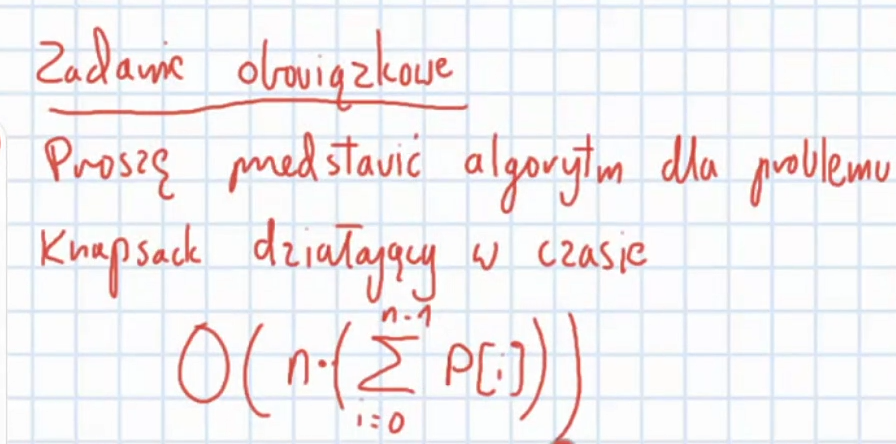

### Omówienie algorytmu

##### Omówienie działania algorytmu

W pierwszym kroku, w celu zoptymalizowania czasu poszukiwania rozwiązania, odfiltrowujemy te przedmioty, które nie zmieszczą nam się nigdy do plecaka, nawet jeżeli chcielibyśmy włożyć tylko jeden taki przedmiot oraz te, których profit jest niedodatni (bo nie ma z nich żadnej korzyści). Dzięki odfiltrowaniu "za ciężkich" przedmiotów, mamy pewność, że nie będziemy niepotrzebnie wypełniać tabicy wartości funkcji dla tych wartości, bo musielibyśmy wówczas przepisać cąły powyższy wiersz (bez sensu).
<br><br>
Po odfiltrowaniu sprawdzamy, czy pozostał choć jeden przedmiot, który da się włożyć do plecaka. Jeżeli nie (bo wszystkie były za ciężkie), zwracamy 0, bo maksymalny profit, jaki osiągniomy to 0 (czyli brak profitu). Natomiast, gdy pozostały jakieś przedmioty, przgotowujemy tablicę o wymiarach $ n \times (MaxP + 1) $, gdzie $ n $ - liczba pozostałych przedmiotów, $ MaxP $ - maksymalny możliwy do osiągnięcia profit. Tablicę wypełniamy wartościami $ MaxW + 1 $ (bo są to najmniejsze nieosiągalne przez nas wartości), które dla nas będą oznaczały, że niemożliwe jest wypełnienie plecaka tak, aby uzyskać profit przynajmniej równy indeksowi kolumny $ p $ (innymi słowy, nie możemy wybrać spośród posiadanych przedmiotów takich przedmiotów, że nie przekroczą one maksymalnej wagi plecaka i jednocześnie łączny profit z tych przedmiotów będzie nie mniejszy niż indeks kolumny $ p $). <br><br>
Co oznaczają kolumny i wiersze w tablicy? <br>
- Wiersze - kolejne wiersze odpowiadają kolejnym przedmiotom (tzn. wiersz o indeksie $ i $ odpowiada przedmiotowi, którego waga wynosi $ W[i] $, a profit $ P[i] $), <br>
- Kolumny - indeksy kolejnych kolumn oznaczają minimalne profity (tzn. kolumna o indeksie $ p $ odpowiada takim przedmiotom, że ich łączny profit jest NIE MNIEJSZY niż $ p $ - więc odpowiada MINIMALNYM profitom, które nie są mniejsze od $ p $), <br>
- Zawartość - komórka o współrzędnych $ F[i][p] $ oznacza MINIMALNĄ wagę wszystkich przedmiotów, jakie trzeba wziąć, aby spełniały one warunek, że łączny profit z tych przedmiotów jest NIE MNIEJSZY niż $ p $ i jednocześnie wybieramy tylko spośród przedmiotów o indeksach $ 0, 1, 2, ..., i-1, i $. Jeżeli niemożliwe jest dobranie przedmiotów, by spełnione były te warunki, komórka nie jest modyfikowana i wciąż zawiera wartość $ MaxW + 1 $. <br><br>

Jaką mamy funkcję? <br>
$ F(i, p) = \left\{
	\begin{array}{ll}
		W[i]  & \mbox{if } P[i] \geq p, \quad W[i] \le F[i - 1][p] \\
        \min\{{F[i - 1][p], F[i - 1][p - P[i]] + W[i]}\} & \mbox{if } P[i] < p, \quad F[i - 1][p - P[i]] + W[i] <= MaxW \\
		F[i - 1][p] & \mbox wpp \\
	\end{array}
\right. $
<br><br>
Trochę wyjaśnień:
- Jeżeli profit obecnie rozważanego przedmiotu (o indeksie $ i $) jest nie mniejszy niż indeks kolumny $ p $, czyli mninimalny profit, jaki muszą mieć elementy, których waga została zapisana w tej kolumnie, oznacza to, że istnieje szansa, iż bardziej opłaca nam się "wyrzucić" przedmioty, które mamy już w plecaku i wziąć ten nowy przedmiot, bo może się okazać, że jest on lżejszy niż poprzednie przedmioty. Zauważmy, że nie musimy sprawdzać, czy waga przedmiotu nie przekracza $ MaxW $, bo jeżeli okaże się, że w komórce $ F[i - 1][p] $ znajduje się wartość równa $ MaxW + 1 $, oznacza to, że mając do dyspozycji tylko przedmioty o indeksach $ 0, 1, 2, ..., i - 1 $, nie byliśmy w stanie wypełnić plecaka tak, by jego profit miał wartość przynajmniej równą $ p $. W takiej sytuacji, sprawdzenie, czy zachodzi nierówność $ W[i] < F[i - 1][p] $ jest zarówno sprawdzeniem, czy waga nowego przedmiotu jest mniejsza niż waga wszystkich wziętych poprzednio przedmiotów dla danego profitu $ p $ oraz, czy jest ona mniejsza niż $ MaxW $. Jeżeli nierówność będzie spełniona, możemy, w zależności od poprzedniego rozwiązania, albo "wyrzucić" wszystkie poprzednio wzięte przedmioty z plecaka i wziąć ten nowy (lżejszy) przedmiot (jest tak, gdy wartość $ F[i - 1][p] $ była nie większa niż $ MaxW $), albo wziąć bieżący przedmiot do pustego plecaka (jest tak, gdy $ F[i - 1][p] = MaxW + 1 $). Tak naprawdę obie opisane operacje sprowadzają się jedynie do wpisania nowej wagi plecaka do komórki $ F[i][p] $, a więc przypisanie jej wagi $ W[i] $, oznaczającej nową (mniejszą niż poprzednia, jeżeli była) wagę plecaka, 
<br>
- Gdy profit $ P[i] $ jest mniejszy niż $ p $ (czyli nie zachodzi powyższy warunek), mamy pewność, że istnieje już jakieś rozwiązanie problemu dla przedmiotów o indeksach $ 0, 1, 2, ..., i - 1 $ i minimalnym proficie (indeksie kolumny) równym $ p - P[i] $ (oczywiście można by spojrzeć, czy istnieje rozwiązanie dla kolumny o indeksie większym niż $ p - P[i] $, ale wtedy otrzymalibyśmy zbyt duży wynikowy profit oraz, prawdopodobnie, większą sumaryczną wagę przedmiotów, bo, jak można zauważyć, wagi w kolejnych wierszach zawsze są uporządkowane niemalejąco). W takiej sytuacji, możemy sprawdzić, co nam się bardziej opłaca, czy dobrać ten przedmiot do przedmiotów o proficie minimalnie $ p - P[i] $, czy nie zabierać tego przedmiotu wcale i wziąć poprzedni zestaw o tym samym proficie, jaki był poprzednio. Jako opłacalność rozumiemy znów nową sumaryczną wagę plecaka, a nie maksymalny profit, bo w obrębie kolumny chcemy go zminimalizować. Ponieważ nie ma przedmiotów o ujemnym proficie, jeżeli chodzi tylko o zysk, to dobranie nowego przedmiotu napewno NIE ZMNIEJSZY nam zysku, więc teoretycznie warto go wziąć, ale jedyną kwestią, która jest w tym momencie istotna dla nas, jest to, że chcemy, aby plecak miał jak najmniejszą wagę dla danego profitu $ p $, więc rozwiązanie dla tego przypadku sprowadza się wyłącznie do sprawdzenia, czy dorzucenie tego przedmiotu do zestawu przedmiotów o proficie $ p - P[i] $ poskutkuje zmniejszeniem wagi plecaka, czy lepiej pominąć ten przedmiot i zostawić zestaw przedmiotów, jaki już poprzednio ustaliliśmy dla profitu nie mniejszego niż $ p $,
<br>
- Zostaje nam ostatni przypadek, gdy nie zaszedł żaden z powyższych warunków, a więc nie mogliśmy ani wszucić tylko tego przedmiotu, który rozważamy, do plecaka (bo jest za ciężki lub ma za mały profit - patrz 1. przypadek funkcji), ani dołożyć go do zestawu przedmiotów o proficie nie większym niż $ p - P[i] $, bo przekroczona zostałaby waga maksymalna. W takim wypadku musimy pominąć ten przedmiot i wziąć poprzedni zestaw (z pola $ F[i - 1][p] $), który wcześniej stworzyliśmy dla danego profitu $ p $. Zawuażmy, że jeżeli taki zestaw nie istnieje, to przepisana zostanie wartość $ MaxW + 1 $, która oznacza, że plecaka nie da się wypełnić tak, by spełnione zostały kryteria,
<br>
- Na podstawie powyższych obserwacji, nasuwa się jeszcze jeden wniosek. Jeżeli po przejściu przez wszystkie 3 przypadki powyższej funkcji, wciąż na polu $ F[i][p] $ znajduje się wartość $ MaxW + 1 $, oznacza to, że nie mogliśmy już nic dołożyć do plecaka, a więc dla danego przedmiotu $ i $ już nic lepszego nie wymyślimy, bo idąc dalej w prawo (przesuwając wskaźnik $ p $ na kolumny o większych profitach) będziemy potrzebować więcej przedmiotów z posiadanego obecnie zestawu, a maksymalna dopuszczalna waga została już i tak przekroczona. W takiej sytuacji najlepiej przerwać pętlę dla $ i $. elementu i przejść do przedmiotu o indeksie $ i + 1 $.
<br><br>
###### UWAGA:
Wynik nie znajdzie się na ostanim polu tablicy, ale będzie tam, gdzie zostanie wpisana ostatnia wartość (waga plecaka) nie większa niż $ MaxW $ i nie będzie zapisany w komórce tablicy, lecz będzie równy indeksowi tej kolumny ostatniego wiersza, w której znajduje się największa waga plecaka, która jednocześnie nie przekracza $ MaxW $. Ponieważ wagi w kolejnych wierszach są w porządku niemalejącym, najlepiej szukać wyniku od końca, jako pierwszej wartości mniejszej lub równej $ MaxW $.

##### Szkic przykładowego rozwiązania

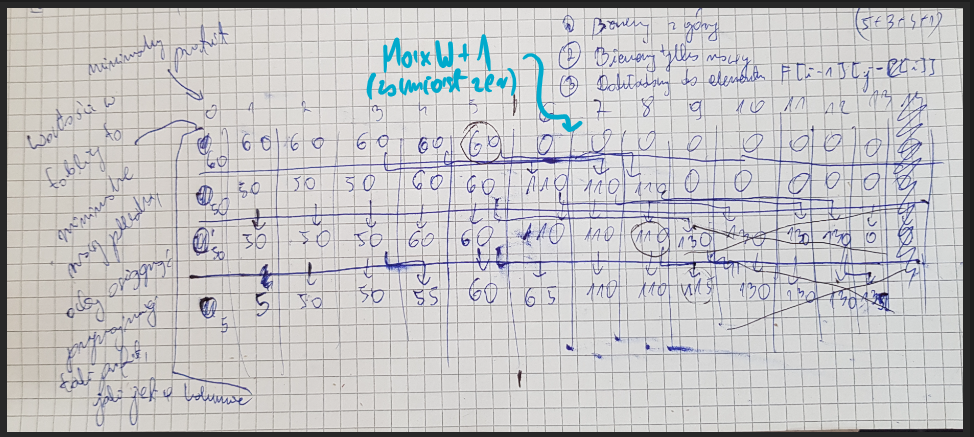

### Implementacja

In [1]:
def filter_items(W, P, MaxW):
    W_filtered = []
    P_filtered = []
    for i in range(len(W)):
        if W[i] <= MaxW and P[i] > 0:
            W_filtered.append(W[i])
            P_filtered.append(P[i])
    return W, P


def knapsack(W, P, MaxW):
    W, P = filter_items(W, P, MaxW)
    if not W: return 0
    S = sum(P)
    
    n = len(P)
    F = [[MaxW + 1] * (S + 1) for _ in range(n)]
    
    # Fill the first row with values if we can do it
    if W[0] <= MaxW:
        for i in range(P[0] + 1):
            F[0][i] = W[0]

    # Fill the remaining part of an array
    for i in range(1, n):
        for p in range(S + 1):   
            F[i][p] = F[i - 1][p]
            
            if P[i] >= p:
                if W[i] < F[i - 1][p]:
                    F[i][p] = W[i]
                    
            elif W[i] + F[i - 1][p - P[i]] <= MaxW:
                F[i][p] = min(F[i][p], W[i] + F[i - 1][p - P[i]])

            if F[i][p] > MaxW:
                break
                
#     print(*F, sep='\n')

    for p in range(S, -1, -1):
        if F[n - 1][p] <= MaxW: return p
            
    return 0

###### Kilka testów

In [2]:
P = [5, 3, 8, 4, 1]
W = [60, 50, 115, 70, 5]
MaxW = 115

knapsack(W, P, MaxW)

9

In [3]:
W = [4, 1, 2, 4, 3, 5, 10, 3]
P = [7, 3, 2, 10, 4, 1, 7, 2]
MaxW = 10

print(knapsack(W, P, MaxW))

20


In [4]:
W = [5, 3, 4, 2]
P = [60, 50, 70, 30]
MaxW = 5

print(knapsack(W, P, MaxW))

80


### Pobieranie zawartości plecaka

###### UWAGA!
Konieczne jest zmodyfikowanie powyższej funkcji tak, aby zwracała ona również tablicę, na której pracowała.

In [5]:
def filter_items(W, P, MaxW):
    W_filtered = []
    P_filtered = []
    for i in range(len(W)):
        if W[i] <= MaxW and P[i] > 0:
            W_filtered.append(W[i])
            P_filtered.append(P[i])
    return W, P


def knapsack(W, P, MaxW):
    W, P = filter_items(W, P, MaxW)
    if not W: return 0, []
    S = sum(P)
    
    n = len(P)
    F = [[MaxW + 1] * (S + 1) for _ in range(n)]
    
    # Fill the first row with values if we can do it
    if W[0] <= MaxW:
        for i in range(P[0] + 1):
            F[0][i] = W[0]

    # Fill the remaining part of an array
    for i in range(1, n):
        for p in range(S + 1):   
            F[i][p] = F[i - 1][p]
            
            if P[i] >= p:
                if W[i] < F[i - 1][p]:
                    F[i][p] = W[i]
                    
            elif W[i] + F[i - 1][p - P[i]] <= MaxW:
                F[i][p] = min(F[i][p], W[i] + F[i - 1][p - P[i]])

            if F[i][p] > MaxW:
                break

    for p in range(S, -1, -1):
        if F[n - 1][p] <= MaxW: return p, F
            
    return 0, []

In [6]:
def _get_knapsack(F, W, P, i, p):
    if i < 0: return []
    if i == 0: return [0] if p == P[0] else []
    if F[i][p] != F[i - 1][p]:
        if p >= P[i] and F[i][p] == F[i - 1][p - P[i]] + W[i]:
            return _get_knapsack(F, W, P, i - 1, p - P[i]) + [i]
        return [i]
    return _get_knapsack(F, W, P, i - 1, p)


def get_knapsack(F, W, P, profit):
    return _get_knapsack(F, W, P, len(F) - 1, profit)

###### Kilka testów

In [7]:
W = [5, 3, 4, 2]
P = [60, 50, 70, 30]
MaxW = 5

profit, F = knapsack(W, P, MaxW)
# print(*F, sep='\n')
print(get_knapsack(F, W, P, profit))

[1, 3]


In [8]:
P = [5, 3, 8, 4, 1]
W = [60, 50, 115, 70, 5]
MaxW = 115

profit, F = knapsack(W, P, MaxW)
print(get_knapsack(F, W, P, profit))

[0, 1, 4]


In [9]:
W = [4, 1, 2, 4, 3, 5, 10, 3]
P = [7, 3, 2, 10, 4, 1, 7, 2]
MaxW = 10

profit, F = knapsack(W, P, MaxW)
print(get_knapsack(F, W, P, profit))

[0, 1, 3]


##### Zautomatyzowane testy

In [10]:
import random

def knapsack_model(W: 'wagi przedmiotów', P: 'profity', MaxW: 'maksymalna waga plecaka'):
    n = len(W)
    # Create a 2-dimensional array to cache solutions for <index, weight> pairs. We will
    # treat this array as a table where columns correspond to the actual weight of a knapsack
    # and rows for indices of items which were taken to the knapsack.
    F = [[0] * (MaxW + 1) for _ in range(n)]
    # Fill the first row using values which will be a result of function when we choose only
    # the first item (this of index 0)
    for i in range(W[0], MaxW + 1):
        F[0][i] = P[0]
    
    for i in range(1, n):
        for w in range(1, MaxW + 1):
            F[i][w] = F[i - 1][w]
            if w >= W[i]:
                F[i][w] = max(F[i][w], F[i - 1][w - W[i]] + P[i])
        
    return F[n-1][MaxW], F


def _get_knapsack_model(F, W, P, i, w):
    if i < 0: return []
    if i == 0: return [0] if w >= W[0] else []
    if w >= W[i] and F[i][w] == F[i - 1][w - W[i]] + P[i]:
        return _get_knapsack_model(F, W, P, i - 1, w - W[i]) + [i]
    return _get_knapsack_model(F, W, P, i - 1, w)


def get_knapsack_model(F, W, P):
    return _get_knapsack_model(F, W, P, len(F) - 1, len(F[0]) - 1)


def compare_contents(P, W, C1, C2, MaxW):
    # Check if sum of profits is correct and sum of weights lower than the MaxW
    w1 = p1 = 0
    for i in C1:
        w1 += W[i]
        p1 += P[i]
    
    w2 = p2 = 0
    for i in C2:
        w2 += W[i]
        p2 += P[i]
    
    return p1 == p2 and w1 <= MaxW and w2 <= MaxW
    

def test(profit_fn, 
         contents_fn, 
         samples=20, 
         items_count=(1, 15),
         profits_range=(1, 100), 
         weights_range=(1, 100),
         print_F=True,
         failed_only=False):
    
    passed_profits = passed_contents = 0
    for i in range(1, samples + 1):
        n = random.randint(*items_count)
        P = [random.randint(*profits_range) for _ in range(n)]
        W = [random.randint(*weights_range) for _ in range(n)]
        MaxW = random.randint(0, sum(W))
        expected_profit, expected_F = knapsack_model(W, P, MaxW)
        result_profit, result_F = profit_fn(W, P, MaxW)
        is_profit_correct = result_profit == expected_profit
        passed_profits += is_profit_correct
        expected_contents = get_knapsack_model(expected_F, W, P)
        result_contents = contents_fn(result_F, W, P, result_profit)
        are_contents_correct = compare_contents(P, W, expected_contents, result_contents, MaxW)
        passed_contents += are_contents_correct
        is_test_passed =  are_contents_correct and is_profit_correct
        if not failed_only or (failed_only and not is_test_passed):
            print(f'===== Test #{i}: =====')
            print('Input profits:', P)
            print('Input weights:', W)
            print('Input MaxW:   ', MaxW)
            print('\nExpected profit:', expected_profit)
            print('Resulting profit:', result_profit)
            print('Is profit correct?:', is_profit_correct)
            print('\nContents of a knapsack:')
            print('Expected:', expected_contents)
            print('Result:  ', result_contents)
            print(f'\nProfit tests passed:   {passed_profits}/{i}')
            print(f'\nContents tests passed: {passed_contents}/{i}')
            print('Is current test passed?:', is_test_passed)
            print('\n')
    print('\n===== Final results: =====')
    print(f'Total profit tests passed:   {passed_profits}/{samples}')
    print(f'Total contents tests passed: {passed_contents}/{samples}')
    print(f'An algorithm is {"CORRECT" if passed_contents == passed_profits == samples else "WRONG"}')

###### Kilka testów

In [11]:
test(knapsack, get_knapsack, 
     samples=3, items_count=(1, 100), profits_range=(0, 100), weights_range=(1, 100), 
     failed_only=False)

===== Test #1: =====
Input profits: [68, 53, 30, 99, 61, 85, 61, 67, 19, 63, 77, 87, 15, 79, 2, 85, 53, 26, 34, 5, 8, 56, 49, 80, 62, 90, 39, 20, 47, 89, 33, 39, 25, 95]
Input weights: [79, 60, 81, 50, 79, 80, 59, 38, 32, 67, 5, 96, 39, 35, 80, 64, 65, 45, 98, 41, 33, 61, 98, 58, 57, 5, 32, 78, 45, 48, 92, 61, 25, 23]
Input MaxW:    1891

Expected profit: 1799
Resulting profit: 1799
Is profit correct?: True

Contents of a knapsack:
Expected: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Result:   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Profit tests passed:   1/1

Contents tests passed: 1/1
Is current test passed?: True


===== Test #2: =====
Input profits: [12, 69, 81, 53, 16, 83, 50, 33, 59, 6, 57, 50, 50, 82, 61]
Input weights: [93, 28, 3, 22, 54, 62, 35, 15, 10, 14, 37, 46, 9, 17, 12]
Input MaxW:    329

Expected profit: 734

##### Troubleshooting

In [12]:
P = [1, 5]
W = [47, 5]
MaxW = 52

profit, F = knapsack(W, P, MaxW)
print(profit)
print(*F, sep='\n')
print(get_knapsack(F, W, P, profit))

6
[47, 47, 53, 53, 53, 53, 53]
[5, 5, 5, 5, 5, 5, 52]
[0, 1]


In [13]:
P = [6]
W = [97]
MaxW = 6

profit, F = knapsack(W, P, MaxW)
print(profit)
print(*F, sep='\n')
print(get_knapsack(F, W, P, profit))

0

[]


In [14]:
P = [10, 1, 5, 4]
W = [18, 13, 91, 31]
MaxW = 10

profit, F = knapsack(W, P, MaxW)
print(profit)
print(*F, sep='\n')
print(get_knapsack(F, W, P, profit))

0

[]
